# Code For Four Quadrant Experiment

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from Models import *
from SmoothHess import SmoothGeneral
import sys 
from torch.autograd.functional import hessian 
import warnings
warnings.filterwarnings("ignore")


# Load Network

In [2]:
network_args = {
    "network"  : "FCN",
    "input_dim" : 2,
    "feature_dim" : 250,
    "network_dimensions": "500-300-250-250",
    "loss_type" : "supervised_ce",
    "num_classes" : 1
 }

In [3]:
model = getattr(sys.modules[__name__], network_args['network'])(**network_args).cuda()
model.load_state_dict(torch.load("./Models/FourQuadrant.pth"))
model = model.eval()
model = model.cuda()

# Construct Dataset

In [4]:
sigmas1 = np.arange(1e-3, 1e-2, 1e-3)
sigmas2 = np.arange(1e-2, 1e-1, 1e-2)
sigmas3 = np.arange(1e-1,1,5e-3)
sigmas = np.concatenate((sigmas1,sigmas2,sigmas3))

x = torch.tensor((0,0)).cuda() # Point of interest

# Compute SmoothHess Estimates

In [6]:
Hs = np.zeros((len(sigmas),2,2))
for ind in range(len(sigmas)):
    print(ind)
    sigma = sigmas[ind]
    _, H = SmoothGeneral(model, -1, 10, x, True, sigma, 100000, SG = True, SH = True, binary = True, Symmetrize = True, function = "Logit") #Function set to logit when raw model output considered such as for regression
    Hs[ind,:,:]= H.detach().cpu().numpy()

0



1



2



3



4



5



6



7



8



9



10



11



12



13



14



15



16



17



18



19



20



21



22



23



24



25



26



27



28



29



30



31



32



33



34



35



36



37



38



39



40



41



42



43



44



45



46



47



48



49



50



51



52



53



54



55



56



57



58



59



60



61



62



63



64



65



66



67



68



69



70



71



72



73



74



75



76



77



78



79



80



81



82



83



84



85



86



87



88



89



90



91



92



93



94



95



96



97



98



99



100



101



102



103



104



105



106



107



108



109



110



111



112



113



114



115



116



117



118



119



120



121



122



123



124



125



126



127



128



129



130



131



132



133



134



135



136



137



138



139



140



141



142



143



144



145



146



147



148



149



150



151



152



153



154



155



156



157



158



159



160



161



162



163



164



165



166



167



168



169



170



171



172



173



174



175



176



177



178



179



180



181



182



183



184



185



186



187



188



189



190



191



192



193



194



195



196



197


# Plot SmoothHess Estimates

Text(0.5, 1.0, 'SmoothHess H[0,1] vs log10 Sigma')

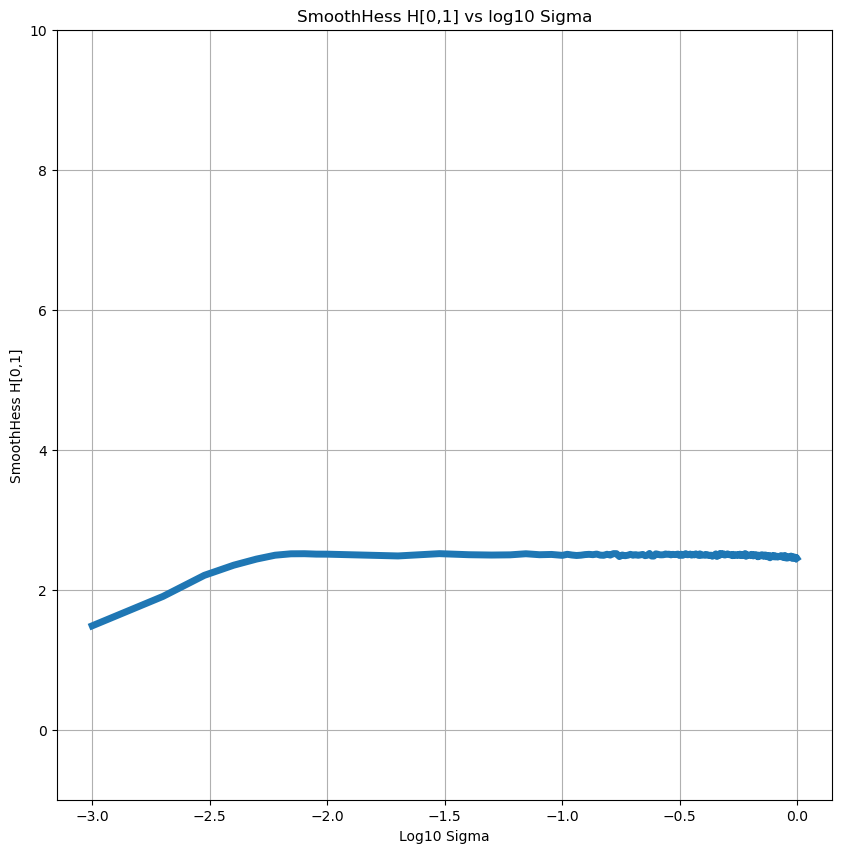

In [ ]:
plt.figure(figsize = (10,10))
plt.plot(np.log10(sigmas), Hs[:,0,1], linewidth = 5)
plt.ylim([-1, 10])
plt.grid()
plt.xlabel("Log10 Sigma")
plt.ylabel("SmoothHess H[0,1]") 
plt.title("SmoothHess H[0,1] vs log10 Sigma")

# Compute SoftPlus Hessians

In [ ]:
beta_range = np.flip(np.concatenate((np.arange(0.1,10, 0.01), np.arange(10,100, 0.1), np.arange(100,1000, 1), np.arange(1000,10000,100))))  

Hs_SoftPlus = np.zeros((len(beta_range),2,2))

x = x.float()
x.requires_grad = True

for index in range(len(beta_range)):
    if index % 500  == 0 :
        print(index)
    beta = beta_range[index]
    model.replace_relu_softplus(beta)

    hess = hessian(model, x).detach().cpu().numpy() 
    Hs_SoftPlus[index] = hess

    model.replace_softplus_relu()

0
500
1000
1500
2000
2500


Text(0.5, 1.0, 'SoftPlus Hessian H[0,1] vs log10 Beta')

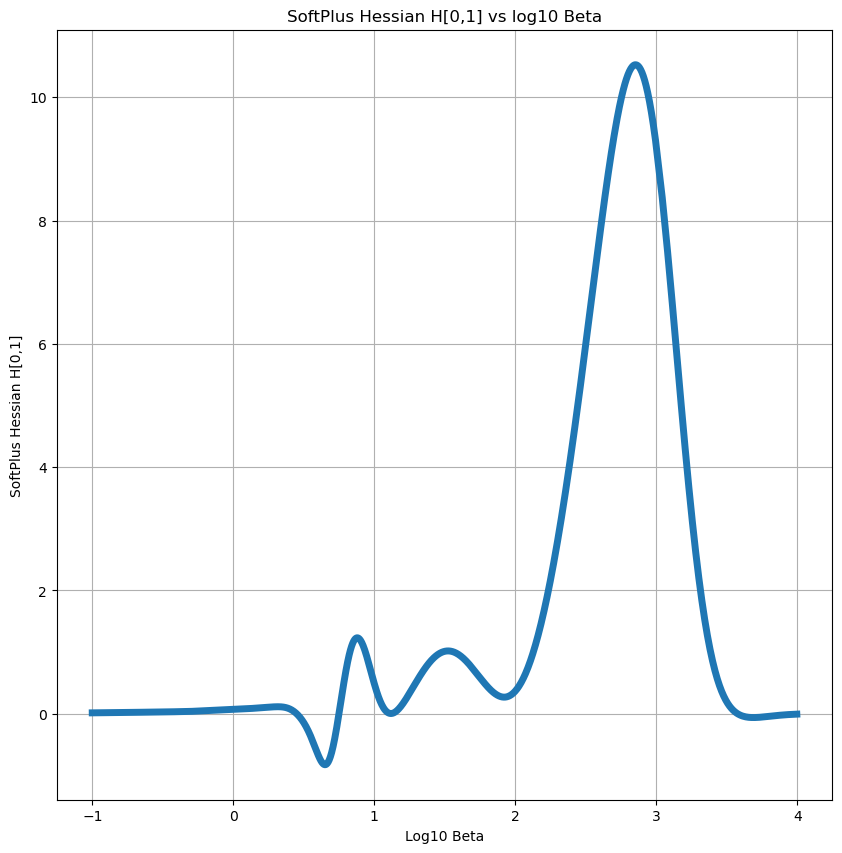

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(np.log10(beta_range), Hs_SoftPlus[:,0,1], linewidth=5) #, color = "#CC4F1B")
plt.grid()
plt.xlabel("Log10 Beta")
plt.ylabel("SoftPlus Hessian H[0,1]") 
plt.title("SoftPlus Hessian H[0,1] vs log10 Beta")